## This file takes the labeled audio tracks and converts them into spectrograms

In [3]:
from pydub import AudioSegment
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy import signal
from librosa import feature
import json
from matplotlib.cm import get_cmap

1. Convert files **from mp3 to wav**

In [ ]:
mp3_path = '/Users/noramendoza/Desktop/DL_project/ALL_DATA/labeled/'
wav_dir = "/Users/noramendoza/Desktop/DL_project/ALL_DATA/wav2/"
os.makedirs(wav_dir, exist_ok=True) # create new dir if does not exist

In [9]:
def mp3_to_wav(mp3_path, wav_path):
        audio = AudioSegment.from_mp3(mp3_path)
        file_name = os.path.basename(mp3_path)
        numbers, _ = file_name.split(".")
        audio.export(wav_path + numbers + ".wav", format="wav")

In [11]:
for audio_file in glob.glob(os.path.join(mp3_path, "*.mp3")):
    file_name = os.path.basename(audio_file)
    wav_path = "/Users/noramendoza/Desktop/DL_project/ALL_DATA/wav/"    
    mp3_path = '/Users/noramendoza/Desktop/DL_project/ALL_DATA/labeled/'+ file_name

    mp3_to_wav(mp3_path, wav_path)

In [5]:
wav_dir = "/Users/noramendoza/Desktop/DL_project/ALL_DATA/wav/"

2. Convert audio from **stereo to mono**, since we do not need that much info

In [6]:
from pydub import AudioSegment

def to_mono (input_file, output_dir): 
    audio = AudioSegment.from_file(input_file)
    mono_audio = audio.set_channels(1)
    file_name = os.path.basename(input_file)
    mono_audio.export(os.path.join(output_dir, file_name), format="wav")

In [7]:
mono_dir = "/Users/noramendoza/Desktop/DL_project/ALL_DATA/mono_audio/"
os.makedirs(mono_dir, exist_ok=True) # create new directory if does not exit

for audio_file in glob.glob(os.path.join(wav_dir, "*.wav")):
    to_mono(audio_file, mono_dir)

3. Convert **audio files into spectrograms** 

In [15]:
dict1 = {}

spectro_dir = "/Users/noramendoza/Desktop/DL_project/ALL_DATA/spectrograms/"
os.makedirs(spectro_dir, exist_ok=True) # create new directory

cmap = get_cmap('gray')  # Grayscale colormap

/var/folders/1z/j2744qw140bbxtk0yqsb27z00000gn/T/ipykernel_2404/1520054664.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('gray')  # Grayscale colormap


In [16]:
for audio_file in glob.glob(os.path.join(mono_dir, "*.wav")):
    file_name = os.path.basename(audio_file)
    w = mono_dir + file_name
    Fs, aud = wavfile.read(w)
    p = plt.specgram(aud, Fs=Fs)
    plt.savefig(spectro_dir + file_name + ".png")

/Users/noramendoza/Library/Python/3.8/lib/python/site-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


#### Let's see how the spectrograms look like

In [4]:
import matplotlib.image as mpimg

def print_img(filename, title, dir):
    filename = filename + '.png'
    print("Music genre: ", title.upper())
    
    if filename not in os.path.join(dir): 
        f = '0' + filename
    try:   
        image = mpimg.imread(os.path.join(dir, f))

    except: 
        f = '1' + filename
        image = mpimg.imread(os.path.join(dir, f))
        
    plt.figure(figsize=(25, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [7]:
imgs = []
dir = "/Users/noramendoza/Desktop/DL_project/data/spectrograms/"
for filename in os.listdir(dir):
    if filename[0]:
        filename = filename[1:]  # Remove the first character
        filename = filename.split('.')
    imgs.append(filename[0])

Music genre:  HIP-HOP


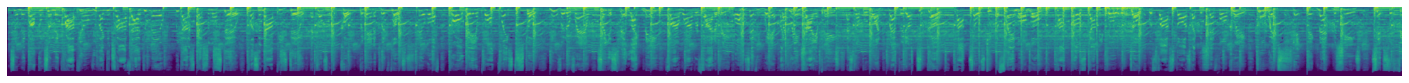

Music genre:  POP


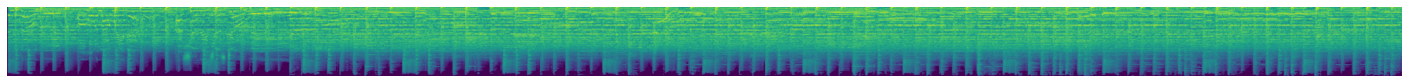

Music genre:  EXPERIMENTAL


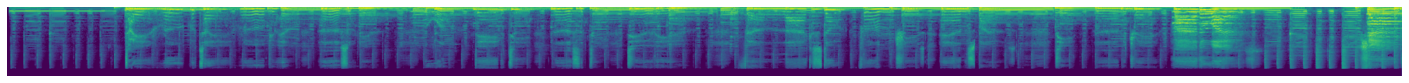

Music genre:  ROCK


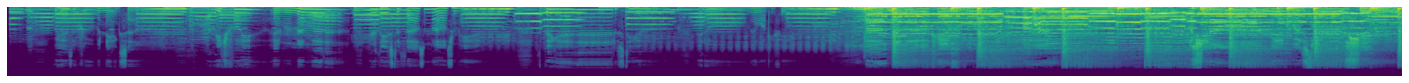

Music genre:  FOLK


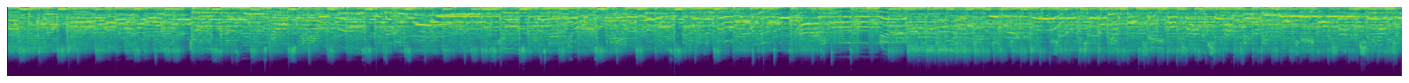

Music genre:  ELECTRONIC


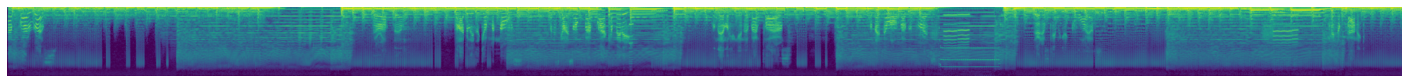

Music genre:  INTERNATIONAL


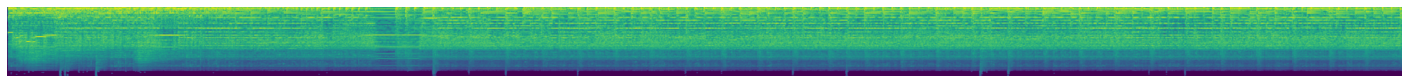

Music genre:  INSTRUMENTAL


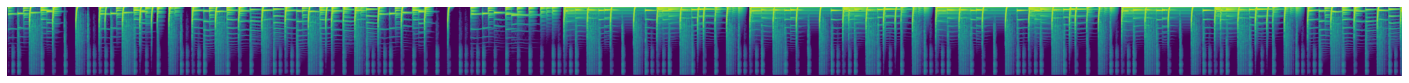

In [9]:
gens = []
file_path = "/Users/noramendoza/Desktop/DL_project/ALL_DATA/song_dictionary.json" #this dictionary was saved in label_files.ipynb

with open(file_path, "r") as file:
    # Load the JSON data from the file into a dictionary
    song_dict = json.load(file)

k = list(song_dict.keys())
v = list(song_dict.values())


for i in k:
    filename = str(i)

    while len(filename) <5: 
        filename = '0' + filename
    
    if filename in imgs:
        idx = k.index(i)
        label = v[idx]
        if label not in gens:
            gens.append(label)
            print_img(filename, label, dir)